# Testing the behavior of the different cells

## The purpose of this notebook is to examine the following:

-   What can we do with a text cell?
-   What is the scope of the code cell?
    -   Batch
    -   Transaction

## Modifying the different text.

### Clicking inside of the cell to show more!

Let's play with the different mark-ups and formatting built-in to set this up properly.

**bold**  
_italics_  
<u>underline</u>  
<mark>highlight</mark>

How about images? Try inserting one below:

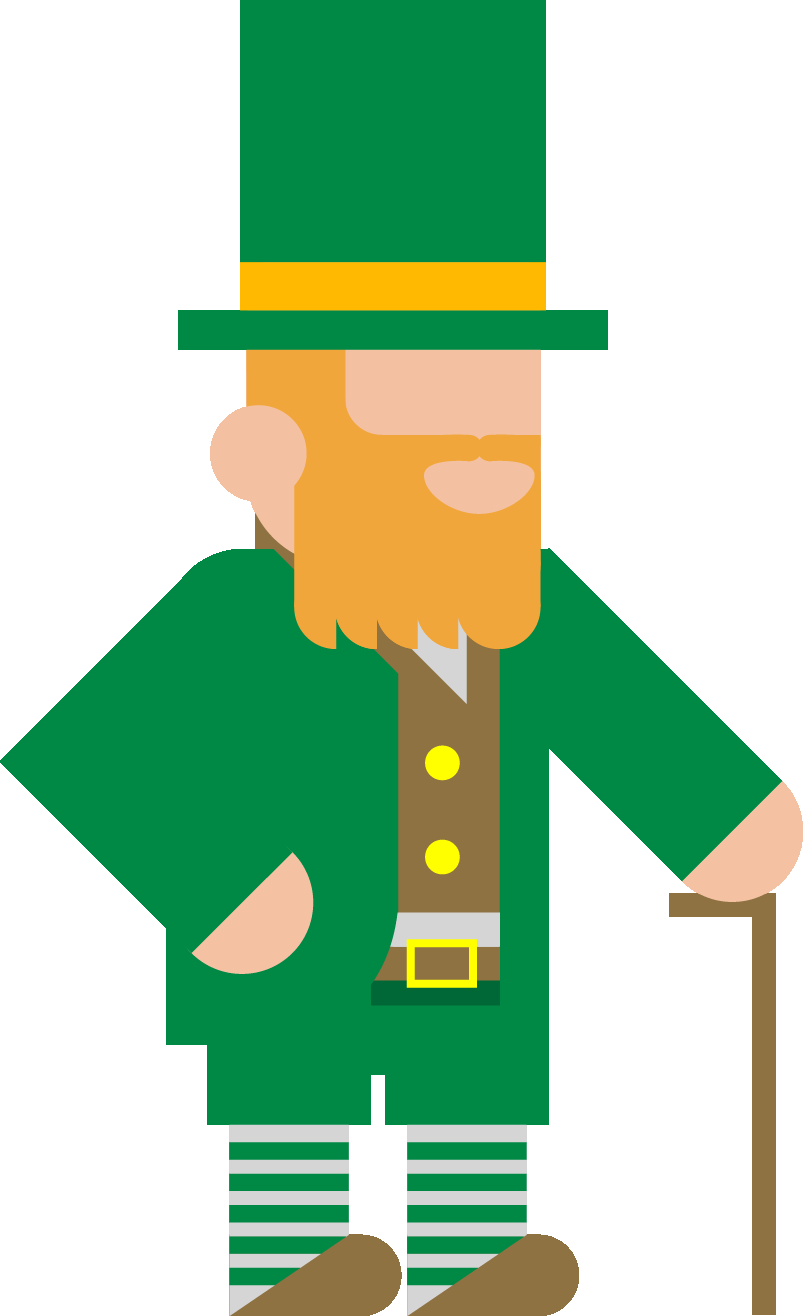  

If you are interested, there is a [site](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) with Markdown for Jupyter notebooks. You may decide it's not needed with what's provided here.

## Testing the behavior of the cells 
### Do the cells work the same way that we are used to working with them in Management Studio?

It's very easy to think that the text cells that can be used enhance the comments that we're used to seeing with SSMS. But is that really the case? Let's play a little bit before we start doing our work. 

In Management Studio, you can highlight part of the code and just execute that. Is that the case here?

In [ ]:
SELECT 'This is my first statement';

SELECT 'This is my second statement';

## What's the scope of a cell?
Declare the variable in its own cell

In [ ]:
DECLARE @test DATETIME = getdate();

See the value of the variable set in the previous cell.

In [ ]:
SELECT @test;

Try both cells together

In [ ]:
DECLARE @test DATETIME = GETDATE();

SELECT @test;

## Transactions
Let's see what happens when we use Explicit Transactions. First, let's start our transaction.

In [ ]:
USE Superheroes;
BEGIN TRANSACTION celltocell;

Now to see if the transaction is still open

In [ ]:
DBCC OPENTRAN;

select * from sys.dm_tran_active_transactions;


Let's do an update somewhere so we can get some locks and see what happens.

In [ ]:
UPDATE aep
SET Alter_Ego_ID = ae.Alter_Ego_ID
FROM Alter_Ego_Person as aep 
	JOIN Person as p ON aep.Person_ID = p.Person_ID
	CROSS JOIN Alter_Ego as ae 
WHERE (First_Name = 'Deborah' AND Last_Name = 'Melkin') 
AND Alter_Ego_Name = 'Wonder Woman'
;

Time to check the results:

In [ ]:
SELECT p.First_Name, p.Last_Name, ae.Alter_Ego_Name
FROM Person as p 
    JOIN Alter_Ego_Person as aep ON p.Person_ID = aep.Person_ID
    JOIN Alter_Ego as ae ON aep.Alter_Ego_ID = ae.Alter_Ego_ID
WHERE p.Last_Name = 'Melkin'
;

Now let's check our DBCC OPENTRAN and active transactions DMV.

In [ ]:
DBCC OPENTRAN;

select * from sys.dm_tran_active_transactions;


In [ ]:
EXEC sp_lock;

Enough fun - let's reset to where things were...

In [ ]:
ROLLBACK TRAN celltocell;

Let's confirm that everything has been rolled back.

In [ ]:
SELECT p.First_Name, p.Last_Name, ae.Alter_Ego_Name
FROM Person as p 
    JOIN Alter_Ego_Person as aep ON p.Person_ID = aep.Person_ID
    JOIN Alter_Ego as ae ON aep.Alter_Ego_ID = ae.Alter_Ego_ID
WHERE p.Last_Name = 'Melkin';

## SELECT vs PRINT
Is there a difference between SELECT and PRINT?

In [ ]:
SELECT 'Let''s find out...'

In [ ]:
PRINT 'Where''s the fun in that?'